In [ ]:
import pandas as pd 
import numpy as np

**Loading Data**



In [2]:
df = pd.read_csv('Train.csv')

**Eploring the Data**
1. Looking at parameters such as mean,std,max,min,75%,25% and 50% using the "df.describe()" function.
2. Looking at the nautre of our data using "df.head()" function.
3. 

In [5]:
df.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


In [7]:
df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


**DROPING COLUMNS WHICH ARE NOT REVELENT IN OUR PREDICTION PROCESS**


In [9]:
columns = ['ID',	'customer_id', 'tbl_loan_id',	'lender_id'	]
data = df.drop(columns,axis = 1)

**CHECKING IF THERE ARE NULL VALUES IN OUR DATASET**

In [11]:
data.isnull().sum()

country_id                     0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

**CHECKING IF THERE ARE DUPLICATED VALUES IN OUR DATASET**

In [12]:
data.duplicated().sum()

5499

In [14]:
data = data.drop_duplicates()

In [15]:
#REMOVING DUPLICATED VALUES
data.duplicated().sum()

0

**VISUALISING THE LENDER_PORTION_FUNDED WHICH WOULD BE USED FOR COMPARISON IT HAS BEEN TRANSFORMED USING LOG**

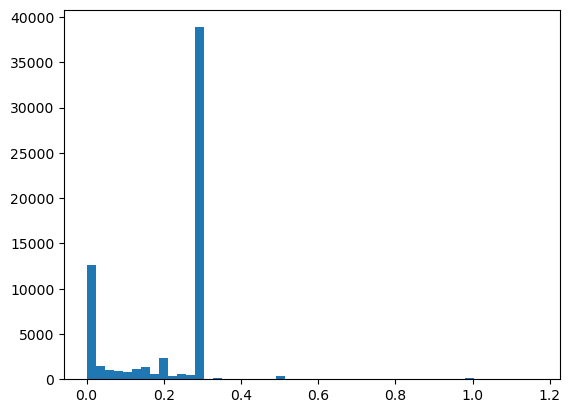

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.hist(data.Lender_portion_Funded,bins = 50)
plt.show()

**OUTLIER DETECTION**

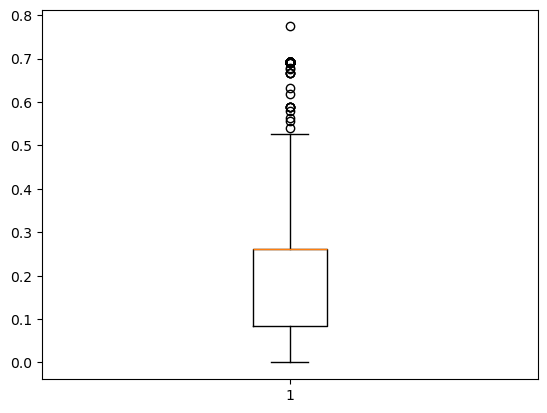

In [133]:
plt.boxplot( x=data.Lender_portion_Funded)
plt.show()

**RESOLVING TH EPROBLEM OF OUTLIERS BY USING LOG TRANSFORM.**

* Log transform would help compress our data points which would reduced the negative effect of outliers.
it would help  the data to get close to being a normal skew*

In [20]:
data.Total_Amount =np.log(data.Total_Amount +1)
data.Total_Amount_to_Repay =np.log(data.Total_Amount_to_Repay +1) 
data.Amount_Funded_By_Lender =np.log(data.Amount_Funded_By_Lender +1)
data.Lender_portion_Funded =np.log(data.Lender_portion_Funded +1)
data.Lender_portion_to_be_repaid =np.log(data.Lender_portion_to_be_repaid +1)

In [22]:
data

,country_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,Kenya,Type_1,9.041803,9.041803,2022-08-30,2022-09-06,7,Repeat Loan,4.802791,0.014204,4.804021,0
1,Kenya,Type_1,10.161844,10.165082,2022-07-30,2022-08-06,7,Repeat Loan,8.957961,0.262364,8.961238,0
2,Kenya,Type_7,8.839422,8.873888,2024-09-06,2024-09-13,7,Repeat Loan,7.230563,0.182322,7.264730,0
3,Kenya,Type_1,9.100414,9.130648,2022-10-20,2022-10-27,7,Repeat Loan,7.896702,0.262364,7.926964,0
4,Kenya,Type_1,8.426174,8.461469,2022-11-28,2022-12-05,7,Repeat Loan,7.222712,0.262364,7.257708,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68648,Kenya,Type_1,7.403061,7.403061,2022-07-21,2022-07-28,7,Repeat Loan,6.200509,0.262364,6.200509,0
68649,Kenya,Type_1,7.286876,7.323831,2022-07-30,2022-08-06,7,Repeat Loan,6.084499,0.262364,6.122493,0
68650,Kenya,Type_1,8.523175,8.540324,2022-07-16,2022-07-23,7,Repeat Loan,7.319666,0.262364,7.336937,0
68652,Kenya,Type_1,8.112228,8.112228,2022-11-23,2022-11-30,7,Repeat Loan,6.609471,0.200720,6.609349,0


**VISUALING OUR DATA AFTER LOG TRANSFORMATION**

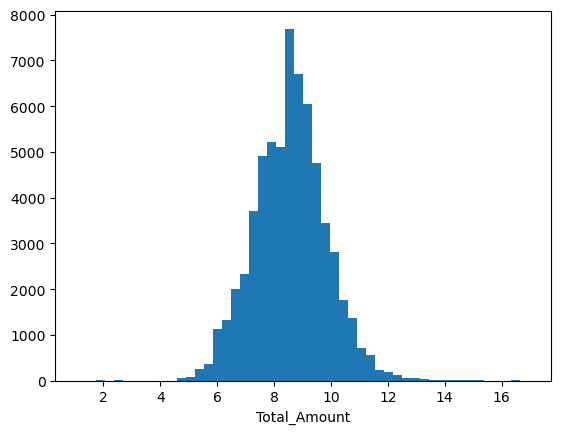

In [149]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.hist(data.Total_Amount,bins = 50)
plt.xlabel('Total_Amount')
plt.show()


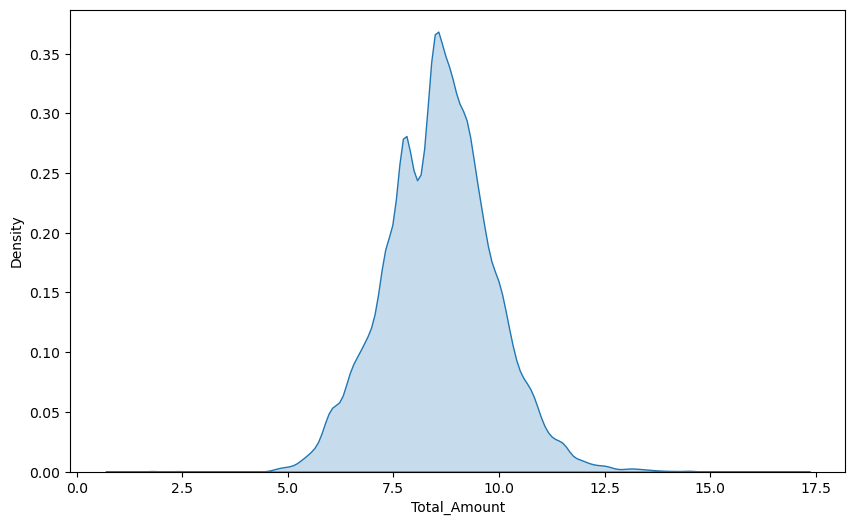

In [26]:
plt.figure(figsize = (10,6))
sns.kdeplot( data.Total_Amount, fill = True)
plt.show()

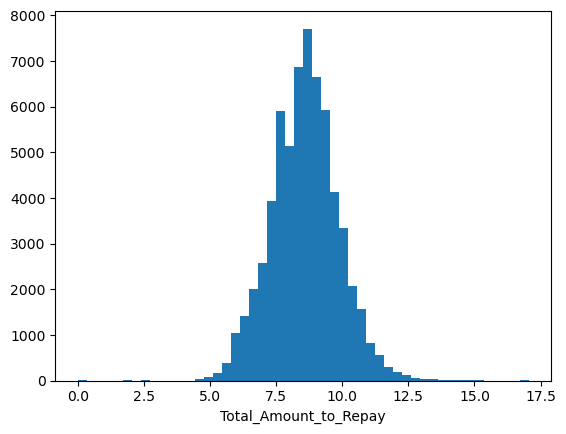

In [151]:
plt.hist(data.Total_Amount_to_Repay,bins = 50)
plt.xlabel('Total_Amount_to_Repay')
plt.show()

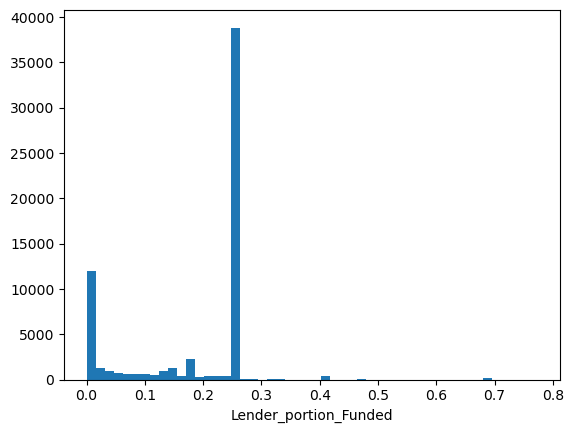

In [153]:
plt.hist(data.Lender_portion_Funded,bins = 50)
plt.xlabel('Lender_portion_Funded')
plt.show()

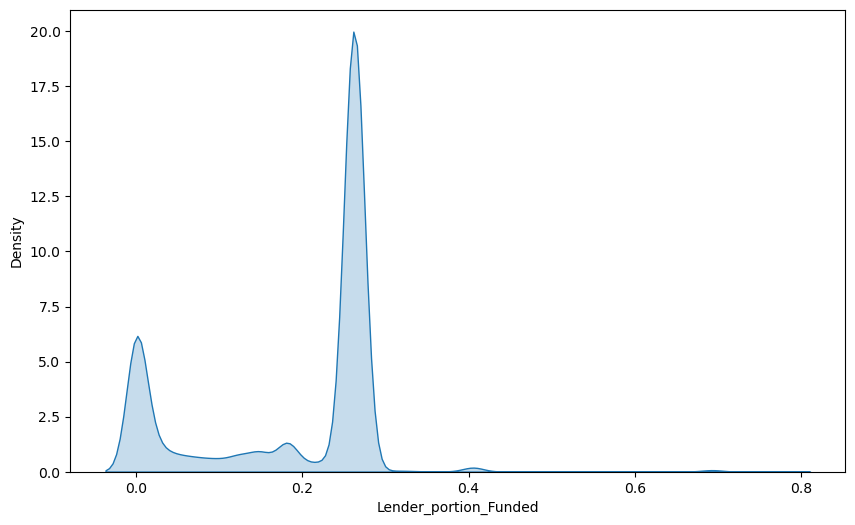

In [29]:
plt.figure(figsize = (10,6))
sns.kdeplot( data.Lender_portion_Funded, fill = True)
plt.show()

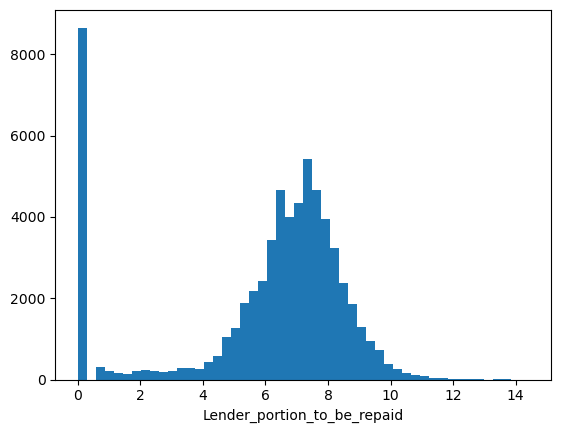

In [155]:
plt.hist(data.Lender_portion_to_be_repaid	,bins = 50)
plt.xlabel('Lender_portion_to_be_repaid')
plt.show()

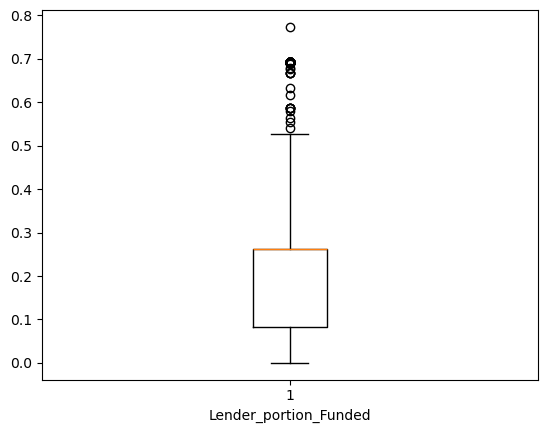

In [159]:
plt.boxplot( x=data.Lender_portion_Funded)
plt.xlabel('Lender_portion_Funded')
plt.show()

**CONVERTING CATEGORICAL DATA INTO NUMERIC DATA USING ONE HOT ENCODING**

In [32]:

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder( handle_unknown = 'ignore' ,sparse_output =False).set_output(transform= 'pandas')
ohe_transform = ohe.fit_transform(df[['loan_type','New_versus_Repeat']])
ohe_transform 

,loan_type_Type_1,loan_type_Type_10,loan_type_Type_11,loan_type_Type_12,loan_type_Type_13,loan_type_Type_14,loan_type_Type_15,loan_type_Type_16,loan_type_Type_17,loan_type_Type_18,...,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_9,New_versus_Repeat_New Loan,New_versus_Repeat_Repeat Loan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68651,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


*concatenating the new numeric data with those of the dataset and dropping the previous one*

In [33]:
df = pd.concat([df,ohe_transform],axis = 1).drop(columns = [ 'loan_type','New_versus_Repeat'])

In [34]:
X = df.drop(columns=['country_id', 'ID', 'disbursement_date', 'due_date', 'target'])

In [35]:
y = df['target']

In [36]:
X

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,loan_type_Type_1,...,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_9,New_versus_Repeat_New Loan,New_versus_Repeat_Repeat Loan
0,266671,248032,267278,8448.0,8448.0,7,120.85,0.014305,121.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,248919,228515,267278,25895.0,25979.0,7,7768.50,0.300000,7794.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,308486,370501,251804,6900.0,7142.0,7,1380.00,0.200000,1428.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,266004,285009,267278,8958.0,9233.0,7,2687.40,0.300000,2770.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,253803,305312,267278,4564.0,4728.0,7,1369.20,0.300000,1418.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,244559,228408,267278,1460.0,1515.0,7,438.00,0.300000,455.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68650,260062,217784,267278,5029.0,5116.0,7,1508.70,0.300000,1535.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68651,259137,216701,267278,5289.0,5289.0,7,1586.70,0.300000,1587.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68652,266801,303201,267278,3334.0,3334.0,7,741.09,0.222283,741.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
y

0        0
1        0
2        0
3        0
4        0
        ..
68649    0
68650    0
68651    0
68652    0
68653    0
Name: target, Length: 68654, dtype: int64

** INSPECT THE TARGET COLUMN**

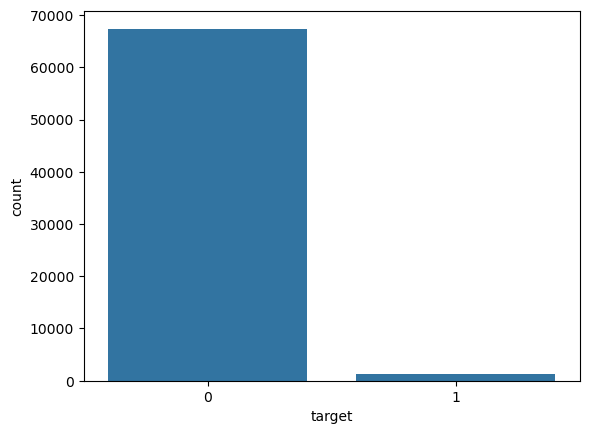

In [165]:
sns.countplot(x ='target' , data = df)
plt.show()

*After we visualized our target we observed that the values it contains are not balanced so we have to balance them by using the code below.*

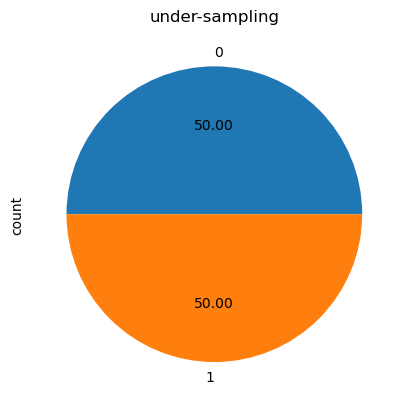

In [171]:

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1)
X_res , y_res = rus.fit_resample(X,y)
ax = y_res.value_counts().plot.pie(autopct= '%.2f')

_ = ax.set_title('under-sampling')

In [173]:
y_res.value_counts()

target
0    1258
1    1258
Name: count, dtype: int64

**SPLITING UP OUR DATA**

In [179]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.8, random_state=11)

**TRAINING WITH THE  DATASET BY USING THE LOGISTIC REGRESSION MODEL**

In [182]:
from sklearn.linear_model import LogisticRegression

In [184]:
model = LogisticRegression(class_weight= 'balanced')

In [186]:
model.fit(X_train, y_train)

C:\Users\TOSHIBA\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [188]:
y_pred = model.predict(X_test)


**CHECKING THE PERFORMANCE OF OUR MODEL**

In [190]:
model.score(X_test,y_test)

0.9309488325881768

In [192]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[957  48]
 [ 91 917]]


In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1005
           1       0.95      0.91      0.93      1008

    accuracy                           0.93      2013
   macro avg       0.93      0.93      0.93      2013
weighted avg       0.93      0.93      0.93      2013

